# Iris Dataset with the Desition Tree Classifier
Like many machine-learning algorithms, decision trees can be used for both classification and regression problems. When we implement the trees for regression, each time a new branch is created, the predicted value for the dependent variable will be the average of the observations that fall within it. Thus, the criterion to separate will be the one that minimizes the error between the real values and the predicted value.

### Load dataset


In [113]:
# General libraries and drive mounting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Scikit-learn modules for classification trees and metrics to evaluate our model:

In [114]:
# Specific modules for decision trees
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión para regresión
from sklearn.tree import plot_tree # Función para visualizar el árbol

# Módulos utiles para evaluar el modelo 
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.metrics import plot_confusion_matrix

In [115]:
from sklearn.datasets import load_iris
data = load_iris()
species = [data['target_names'][x] for x in data['target']]
df = pd.DataFrame(np.column_stack([data['data'], species]), columns=data['feature_names'] + ['species'])

## Exploratory Data Analysis

In [116]:
print('Dimension of the dataset: {}'.format(df.shape))
# Preview of the data
df.head(100)

Dimension of the dataset: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).}



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sepal length (cm)  150 non-null    object
 1   sepal width (cm)   150 non-null    object
 2   petal length (cm)  150 non-null    object
 3   petal width (cm)   150 non-null    object
 4   species            150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [118]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.5,0.2,virginica
freq,10,26,13,29,50


In [119]:
from funpymodeling.exploratory import status

status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal length (cm),0,0.0,0,0.0,35,object
1,sepal width (cm),0,0.0,0,0.0,23,object
2,petal length (cm),0,0.0,0,0.0,43,object
3,petal width (cm),0,0.0,0,0.0,22,object
4,species,0,0.0,0,0.0,3,object


Analyze how many of each species we have to predict

## Viz

We create some variables

In [120]:
spec = df['species'].value_counts()

In [121]:
sp = df['sepal length (cm)'].value_counts()

In [122]:
sw = df['sepal width (cm)'].value_counts()

In [123]:
pl = df['petal length (cm)'].value_counts()

In [124]:
pw = df['petal width (cm)'].value_counts()

Text(0.5, 1.0, 'Number of samples per species')

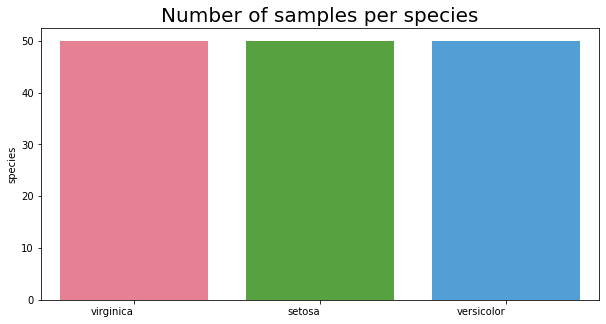

In [149]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=spec, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Number of samples per species", fontsize=20)

Text(0.5, 1.0, 'Species & their sepal length (cm)')

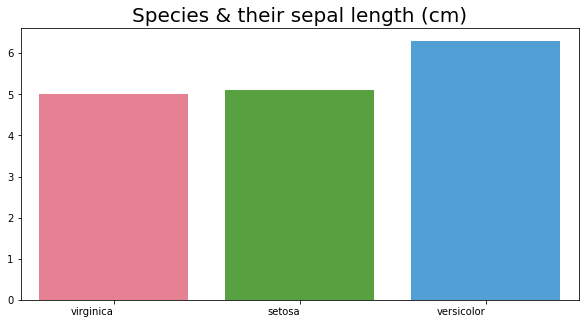

In [150]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=sp.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their sepal length (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their sepal width (cm)')

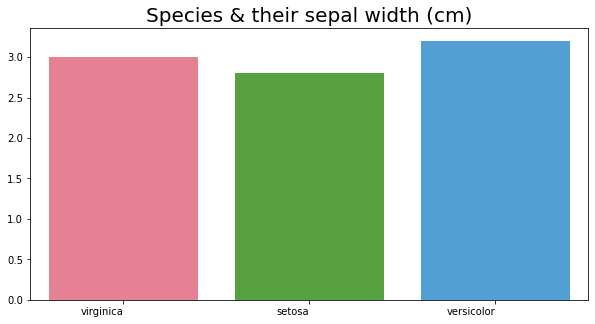

In [155]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=sw.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their sepal width (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their petal lenght (cm)')

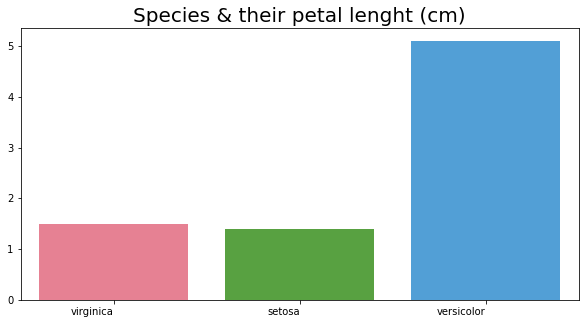

In [152]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=pl.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their petal lenght (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their petal width (cm)')

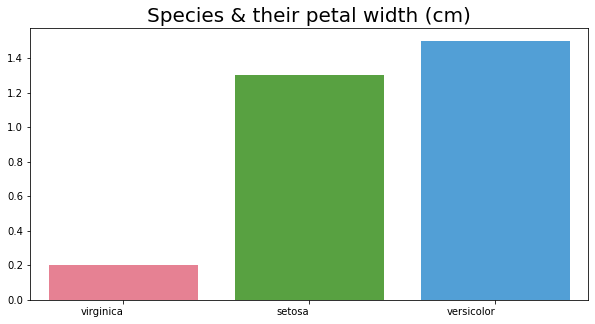

In [153]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=pw.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their petal width (cm)", fontsize=20)

## Construction of the model: Decision Tree


### Preprocessing: feature selection and separation in training and testing

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [156]:
labels, counts = np.unique(df['species'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Labels {}'.format(labels))
print('Frequencies {}'.format(counts))

Labels ['setosa' 'versicolor' 'virginica']
Frequencies [50 50 50]


We separate our data into train and test. We will use a partition of 80% and 20% respectively

In [157]:
random_seed = 7
# Features we are gonna consider 
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Variable we will predict
target = 'species'

# Construction of the matriz of features
X = df[features].to_numpy()

# Construction of the vector we are gonna predict
y = df[target].to_numpy()

# Creation of training and testing matrices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimension of the matrix of features for training: {}'.format(X_train.shape))
print('Dimension of the matrix of features for test: {}'.format(X_test.shape))

Dimension of the matrix of features for training: (120, 4)
Dimension of the matrix of features for test: (30, 4)


### [Create and fit the model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor)

Here we effectively create the classification tree. We are going to start by creating a tree with a depth equal to 2 and then we are going to play with the different parameters.

Like all models in * scikit-learn * there is a line that refers to the construction of the model, another to training, and then we can predict or see the performance of the model.

In [160]:
# Train the model with the fit model
# Train the model
arbol = DecisionTreeClassifier(max_leaf_nodes = 3)
arbol.fit(X_train, y_train)

# Score del modelo en el conjunto de entrenamiento 
score_in_train = arbol.score(X_train, y_train)

# Score del modelo en el conjunto de testeo
score_in_test = arbol.score(X_test, y_test)

print('Score in the training set: {}'.format(score_in_train))
print('Score in the test set: {}'.format(score_in_test))

Score in the training set: 0.9833333333333333
Score in the test set: 0.8666666666666667


In [161]:
# Model score in the training data (we always expect it to be high here)
score_in_train = arbol.score(X_train, y_train)

print('Score in the training set: {}'.format(score_in_train))

Score in the training set: 0.9833333333333333


In [162]:
# Score of the model in the test data
# (here it can fluctuate but in general it is low compared to the training data)
score_in_test = arbol.score(X_test, y_test)

print('Score in the test set: {}'.format(score_in_test))

Score in the test set: 0.8666666666666667


## Visualization of the tree

Here we are going to visualize the tree. For small trees it is good, for large trees you have to adjust the sizes of the figures well.

[Text(334.8, 362.4, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]'),
 Text(167.4, 217.44, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(502.20000000000005, 217.44, 'petal width (cm) <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(334.8, 72.47999999999996, 'gini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(669.6, 72.47999999999996, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

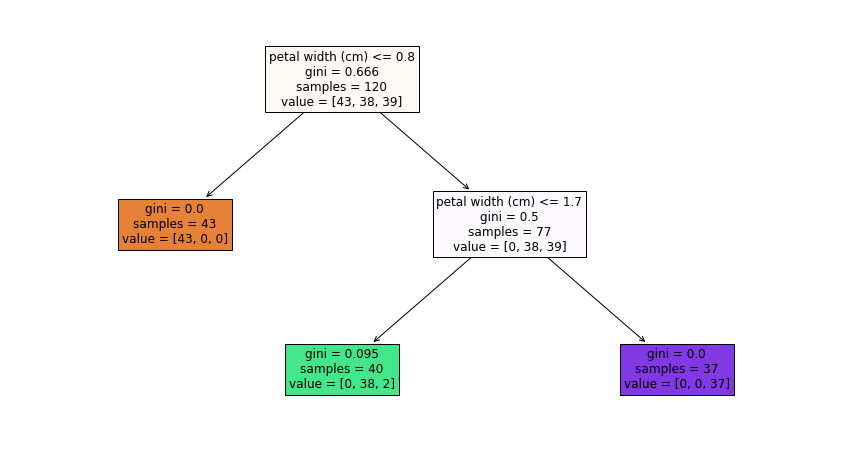

In [163]:
# We create the figure where to plot the tree with matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# We call the "plot_tree" function that we imported from sklearn.tree above.
# We pass the model we create and the name of the features as an argument.
# "fontsize" and "filled" are just display settings
# and we tell him to plot the tree in the figure we create
plot_tree(arbol, feature_names=features, fontsize = 12, filled = True, ax = ax)

**How do we interpret this graph?**

- The tree is read from top to bottom.
- Each node represents a question that is answered with **true** and **false**: if it is true, we take the branch on the left; if it is false, the one on the right.
- The question is marked by the first line in each block.


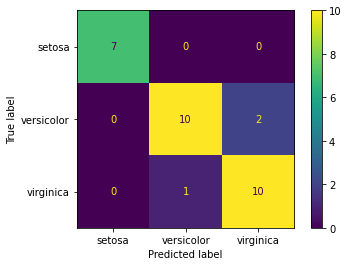

In [17]:
plot_confusion_matrix(arbol, X_test, y_test)  
plt.show()

In [165]:
# This attribute has a measure of the importance of each feature
feature_importance = arbol.feature_importances_ 

print('Features: {}'.format(features))
print('Importance = {}'.format(feature_importance))

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Importance = [0. 0. 0. 1.]


The most important fetaure is the petal with (cm) according to this measure of the importance of each feature.